# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
- Facial emotion detection helps understand a persons mood.
- Each emotion has a uniqure feature that helps in identifying a persons mood.

**The objectives:** What is the intended goal?<br>
- The objective of this project is to train multiple deep learning and transfer learning techniques to create neural network model using train dataset, and select a model that can accurately detect facial emotions.

**The key questions:** What are the key questions that need to be answered?<br>
- Is the train data large enough to make prediction ?
- Is the data well distributed amongst all classes (categories) ?
- Is the facial emotion detection biased ?


**The problem formulation:** What are we trying to solve using data science?
- The goal of this project is to identify a model which can accurately detect facial emotions.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Facial_emotion_images.zip to Facial_emotion_images.zip


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import cv2
import random

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import Deep Learning libraries

import tensorflow as tf
from tensorflow.keras import Model, backend
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

# Import VGG16 libraries
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Import ResNet V2 Model & EfficientNet Model libraries
import tensorflow.keras.applications as ap


import warnings
warnings.filterwarnings('ignore')

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
with zipfile.ZipFile("Facial_emotion_images.zip", 'r') as z:
  z.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

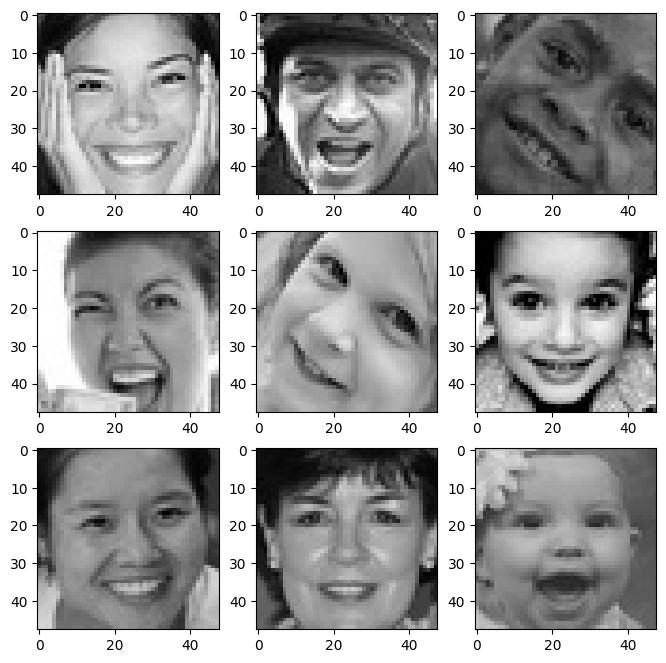

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Eyes are squint slightly, having wrinkles at the corner
- Cheeks raise, with wrinkle runds down the nose
- Mostly both the lips are not touching, showing teeth

### **Sad**

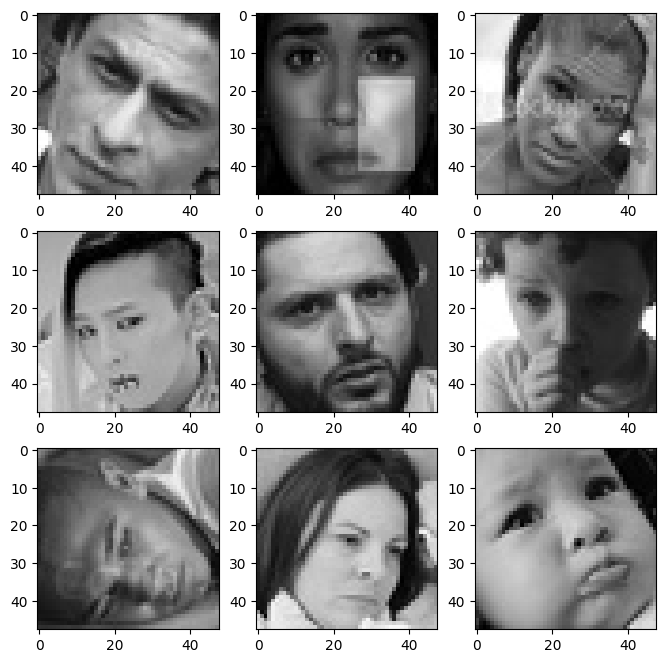

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Inner corner of eyebrows are pulled up and together
- Upper eyelids drooped, and eyes looking down
- Lips corner pulled down slightly

### **Neutral**

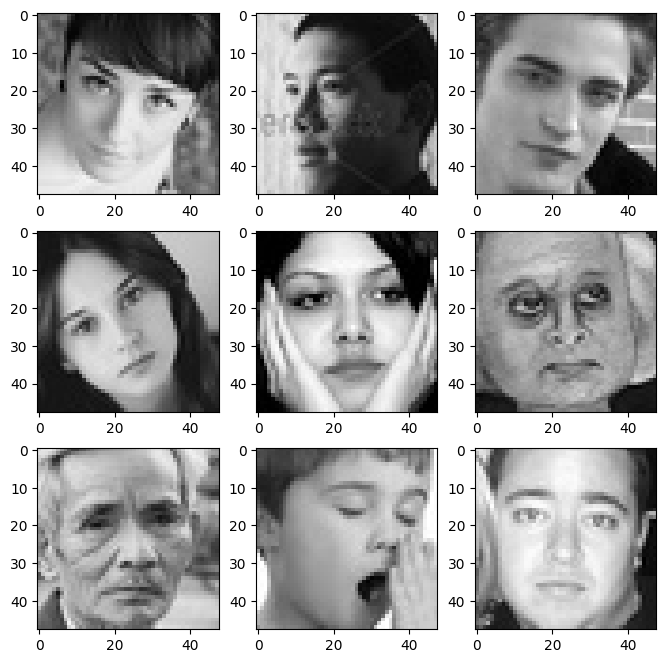

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- No expression i.e. no smiling, frowning, or any other emotion.

### **Surprised**

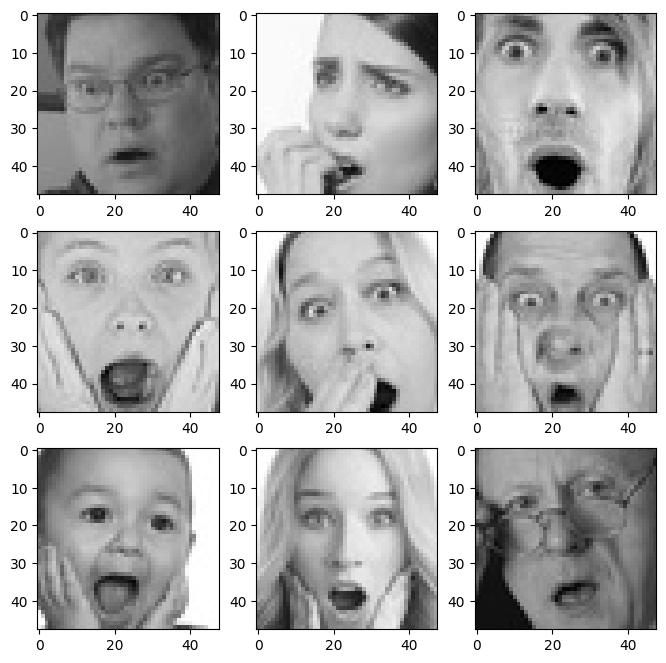

In [ ]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
- Eyebrows are raised
- Eyes are widely open
- mouth is opened, with round lips or mouth i scovered with hands


# **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
data = {}
data['Happy'] = len(os.listdir(folder_path + "train/happy"))
data['Sad'] = len(os.listdir(folder_path + "train/sad"))
data['Neutral'] = len(os.listdir(folder_path + "train/neutral"))
data['Surprise'] = len(os.listdir(folder_path + "train/surprise"))

df = pd.Series(data)
data

{'Happy': 3976, 'Sad': 3982, 'Neutral': 3978, 'Surprise': 3173}

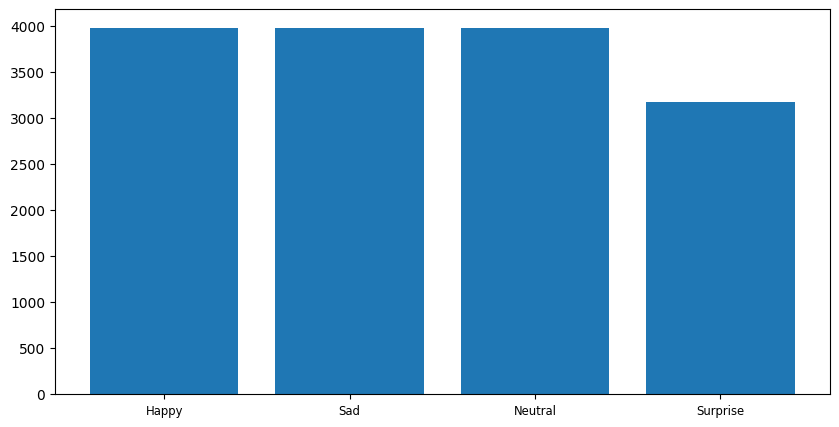

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Observations and Insights:**
- There are over 3000 images for all the categories.
- Suprise category has less images as compare to other categories, but the imbalance is not too high. We can progress using this dataset.
- All the given images are grayscale images, that is why I am using color_mode = 'grayscale' while working with Basic Neural Network and Convolution Neural Network.

Exploratory Data Analysis:
- Image will be loaded with:
-- brightness_range=(0.,2.),
-- rescale=1./255,
-- shear_range=0.3
-- target_size=48 X 48


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

***Note: The original images are in grayscale, that is why I am using color_mode = 'grayscale'***

In [ ]:
# Store path of train images, validation images and test images in a variable, called train_dir, validation_dir and test_dir respectively,
# and storing the unique categories/labels in a list
train_dir = folder_path + "train"
validation_dir = folder_path + "validation"
test_dir = folder_path + "test"

categories =  ["happy", "sad", "neutral", "surprise"]

batch_size  = 32
img_size = 48

In [ ]:
datagen = ImageDataGenerator(horizontal_flip = True,
                             brightness_range=(0.,2.),
                             rescale=1./255,
                             shear_range=0.3)

train_set = datagen.flow_from_directory(train_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 15109 images belonging to 4 classes.


In [ ]:
validation_set = datagen.flow_from_directory(validation_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 4977 images belonging to 4 classes.


In [ ]:
test_set = datagen.flow_from_directory(test_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 128 images belonging to 4 classes.


### **Data Preprocessing**

The arrays train_set and test_set had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our train_set and test_set were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our train_set and test_set, and store the images in x_train, and x_test, and the labels in y_train, and y_test respectively.

In [ ]:
# Create two list for train dataset:
x_train = [] # store the Numpy arrays
y_train = [] # corresponding labels

for i in range(len(train_set)):
    x_train.append(train_set[i][0])
    y_train.append(train_set[i][1])

In [ ]:
# Create two list for validation dataset
x_validation = [] # store the Numpy arrays
y_validation = [] # corresponding labels


for i in range(len(validation_set)):
    x_validation.append(validation_set[i][0])
    y_validation.append(validation_set[i][1])

In [ ]:
# Create two list for test dataset
x_test = [] # store the Numpy arrays
y_test = [] # corresponding labels

for i in range(len(test_set)):
    x_test.append(test_set[i][0])
    y_test.append(test_set[i][1])

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

#### **Fix the seed for random number generators**

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Creating the Base Neural Network**

In [ ]:
# Intializing a sequential model
model_1 = Sequential()

# Add first Conv2D layer with 64 filters and a kernel size of 2. Use the 'same' padding and provide the input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode. Use 'relu' activation.
model_1.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding = "same", input_shape = (48, 48, 1)))

# Add MaxPooling2D layer with pool size = 2.
model_1.add(MaxPooling2D(pool_size = 2))

# Add a Dropout layer with a dropout ratio of 0.2.
model_1.add(Dropout(0.2))

# Add a second Conv2D layer with 32 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation.
model_1.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu', padding = "same"))

# Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

# Add a third Conv2D layer with 32 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation. Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
model_1.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu', padding = "same"))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

# After adding your convolutional blocks, add your Flatten layer.
model_1.add(Flatten())

# Add your first Dense layer with 512 neurons. Use 'relu' activation function.
model_1.add(Dense(512, activation = 'relu'))

# Add a Dropout layer with dropout ratio of 0.4.
model_1.add(Dropout(0.4))

# Add your final Dense Layer with 4 neurons and 'softmax' activation function
model_1.add(Dense(4, activation = 'softmax'))

# Print your model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [ ]:
# Compile model_1 with the loss = categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), and metric = 'accuracy'
model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics=['accuracy']
    )

In [ ]:
checkpoint = ModelCheckpoint("./model_1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# fit model_1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history=model_1.fit(train_set,
          validation_data = validation_set,
          epochs = epochs,
          callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3435 - accuracy: 0.3243

473/473 [==============================] - 48s 99ms/step - loss: 1.3435 - accuracy: 0.3243 - val_loss: 1.2524 - val_accuracy: 0.4328 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2118 - accuracy: 0.4549

473/473 [==============================] - 47s 99ms/step - loss: 1.2118 - accuracy: 0.4549 - val_loss: 1.1119 - val_accuracy: 0.5284 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1290 - accuracy: 0.5048

473/473 [==============================] - 46s 98ms/step - loss: 1.1290 - accuracy: 0.5048 - val_loss: 1.0915 - val_accuracy: 0.5349 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.0860 - accuracy: 0.5220

473/473 [==============================] - 51s 107ms/step - loss: 1.0860 - accuracy: 0.5220 - val_loss: 1.0482 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0475 - accuracy: 0.5370

473/473 [==============================] - 47s 99ms/step - loss: 1.0475 - accuracy: 0.5370 - val_loss: 0.9631 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.0238 - accuracy: 0.5563

473/473 [==============================] - 46s 98ms/step - loss: 1.0238 - accuracy: 0.5563 - val_loss: 0.9405 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.0091 - accuracy: 0.5621

473/473 [==============================] - 47s 99ms/step - loss: 1.0091 - accuracy: 0.5621 - val_loss: 0.9619 - val_accuracy: 0.5921 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.9873 - accuracy: 0.5716

473/473 [==============================] - 46s 98ms/step - loss: 0.9873 - accuracy: 0.5716 - val_loss: 0.9590 - val_accuracy: 0.5984 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.9714 - accuracy: 0.5784

473/473 [==============================] - 47s 99ms/step - loss: 0.9714 - accuracy: 0.5784 - val_loss: 0.9059 - val_accuracy: 0.6231 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.9589 - accuracy: 0.5891

473/473 [==============================] - 47s 99ms/step - loss: 0.9589 - accuracy: 0.5891 - val_loss: 0.9028 - val_accuracy: 0.6253 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.9469 - accuracy: 0.5950

473/473 [==============================] - 47s 99ms/step - loss: 0.9469 - accuracy: 0.5950 - val_loss: 0.8889 - val_accuracy: 0.6259 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 0.9349 - accuracy: 0.5983

473/473 [==============================] - 47s 100ms/step - loss: 0.9349 - accuracy: 0.5983 - val_loss: 0.8808 - val_accuracy: 0.6289 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.9273 - accuracy: 0.6033

473/473 [==============================] - 47s 98ms/step - loss: 0.9273 - accuracy: 0.6033 - val_loss: 0.8545 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 0.9100 - accuracy: 0.6120

473/473 [==============================] - 47s 99ms/step - loss: 0.9100 - accuracy: 0.6120 - val_loss: 0.8452 - val_accuracy: 0.6502 - lr: 0.0010
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 0.9015 - accuracy: 0.6157

473/473 [==============================] - 47s 99ms/step - loss: 0.9015 - accuracy: 0.6157 - val_loss: 0.8331 - val_accuracy: 0.6510 - lr: 0.0010
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 0.8932 - accuracy: 0.6261

473/473 [==============================] - 47s 99ms/step - loss: 0.8932 - accuracy: 0.6261 - val_loss: 0.8517 - val_accuracy: 0.6430 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.8806 - accuracy: 0.6259

473/473 [==============================] - 51s 109ms/step - loss: 0.8806 - accuracy: 0.6259 - val_loss: 0.8490 - val_accuracy: 0.6494 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 0.8828 - accuracy: 0.6239

473/473 [==============================] - 47s 99ms/step - loss: 0.8828 - accuracy: 0.6239 - val_loss: 0.8134 - val_accuracy: 0.6681 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.8736 - accuracy: 0.6339

473/473 [==============================] - 47s 99ms/step - loss: 0.8736 - accuracy: 0.6339 - val_loss: 0.8254 - val_accuracy: 0.6526 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 0.8642 - accuracy: 0.6314

473/473 [==============================] - 47s 99ms/step - loss: 0.8642 - accuracy: 0.6314 - val_loss: 0.8217 - val_accuracy: 0.6705 - lr: 0.0010


### **Evaluating the Model on the Test Set**

In [ ]:
model_1.evaluate(x_test[0], y_test[0])

1/1 [==============================] - 0s 108ms/step - loss: 0.8200 - accuracy: 0.6562


[0.820043683052063, 0.65625]

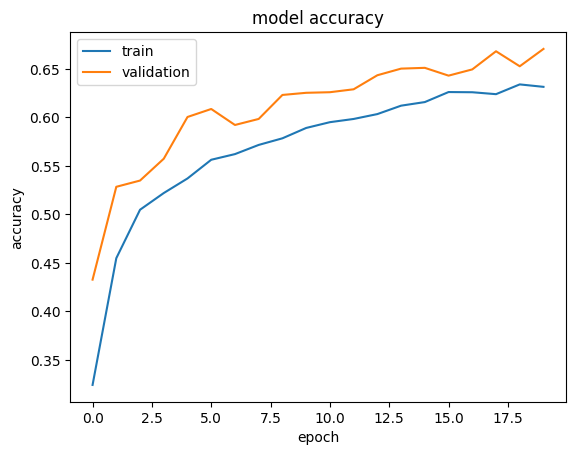

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x_test_normalized = np.array(x_test) / 255.0
x_test_normalized.shape

(4, 32, 48, 48, 1)

**Observations and Insights:**
- The above graph suggest that this model is not doing well on the validation data, with 82% loss and 65 % accuracy
- The model is also slightly overfitting the training data.

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Initializing a sequential model
model_2 = Sequential()


# Add first Conv2D layer with 256 filters and a kernel size of 2. Use the 'same' padding and provide the input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode. Use 'relu' activation.
model_2.add(Conv2D(filters = 256, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (48, 48, 1)))

# Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of 0.1
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))

# Add MaxPooling2D layer with pool size = 2.
model_2.add(MaxPooling2D(pool_size = 2))

# Add a second Conv2D layer with 128 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation.
model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))

# Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = 2))

# Add a third Conv2D layer with 64 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation. Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
model_2.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))

# Add a fourth block, with the Conv2D layer having 32 filters.
model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))

# After adding your convolutional blocks, add your Flatten layer.
model_2.add(Flatten())

# Add your first Dense layer with 512 neurons. Use 'relu' activation function.
model_2.add(Dense(512, activation = 'relu'))

# Add the second Dense Layer with 128 neurons and use 'relu' activation function.
model_2.add(Dense(128, activation = 'relu'))

# Add your final Dense Layer with 4 neurons and 'softmax' activation function
model_2.add(Dense(4, activation = 'softmax'))

# Print your model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

### **Compiling and Training the Model**

In [ ]:
# Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint("./model_2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                               mode = 'min',
                               verbose = 1,
                               patience = 5)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# fit model_2. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.
history=model_2.fit(train_set,
          validation_data = validation_set,
          epochs = epochs,
          callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2529 - accuracy: 0.4131

473/473 [==============================] - 322s 676ms/step - loss: 1.2529 - accuracy: 0.4131 - val_loss: 1.2193 - val_accuracy: 0.4987 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.0520 - accuracy: 0.5400

473/473 [==============================] - 316s 669ms/step - loss: 1.0520 - accuracy: 0.5400 - val_loss: 1.0337 - val_accuracy: 0.5664 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9564 - accuracy: 0.5877

473/473 [==============================] - 313s 662ms/step - loss: 0.9564 - accuracy: 0.5877 - val_loss: 0.9930 - val_accuracy: 0.5712 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.8780 - accuracy: 0.6248

473/473 [==============================] - 313s 662ms/step - loss: 0.8780 - accuracy: 0.6248 - val_loss: 1.0960 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 0.8127 - accuracy: 0.6540

473/473 [==============================] - 314s 664ms/step - loss: 0.8127 - accuracy: 0.6540 - val_loss: 0.8575 - val_accuracy: 0.6504 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 0.7462 - accuracy: 0.6904

473/473 [==============================] - 330s 699ms/step - loss: 0.7462 - accuracy: 0.6904 - val_loss: 0.8421 - val_accuracy: 0.6518 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.7155

473/473 [==============================] - 314s 665ms/step - loss: 0.6883 - accuracy: 0.7155 - val_loss: 0.8446 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.6252 - accuracy: 0.7470

473/473 [==============================] - 313s 662ms/step - loss: 0.6252 - accuracy: 0.7470 - val_loss: 0.8708 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.7748


Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 316s 668ms/step - loss: 0.5704 - accuracy: 0.7748 - val_loss: 0.9082 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.4135 - accuracy: 0.8412

473/473 [==============================] - 317s 670ms/step - loss: 0.4135 - accuracy: 0.8412 - val_loss: 0.8986 - val_accuracy: 0.6777 - lr: 2.0000e-04
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.8685

473/473 [==============================] - 314s 665ms/step - loss: 0.3510 - accuracy: 0.8685 - val_loss: 0.9712 - val_accuracy: 0.6773 - lr: 2.0000e-04
Epoch 11: early stopping


### **Evaluating the Model on the Test Set**

In [ ]:
model_2.evaluate(x_test[0], y_test[0])

1/1 [==============================] - 0s 341ms/step - loss: 1.1920 - accuracy: 0.6250


[1.1919984817504883, 0.625]

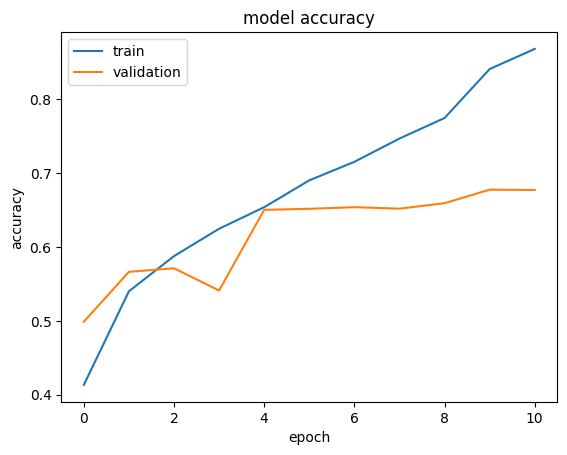

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:**
- Stopped training at epoch 11 because there was no imporvement in terms of val_loss for last 5 epochs
- CNN has done poorly on the validation data.
- The model is highly overfitting the training data.
- We cannot accept this model

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

### **Fix the seed for random number generators**


we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
backend.clear_session()

# seed for random number generators will be erased becasue of clear session, Fix it again
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# Store path of train images, validation images and test images in a variable, called train_dir, validation_dir and test_dir respectively,
# and storing the unique categories/labels in a list
train_dir = folder_path + "train"
validation_dir = folder_path + "validation"
test_dir = folder_path + "test"

categories =  ["happy", "sad", "neutral", "surprise"]

batch_size  = 32
img_size = 48

In [ ]:
datagen = ImageDataGenerator(horizontal_flip = True,
                             brightness_range=(0.,2.),
                             rescale=1./255,
                             shear_range=0.3)

train_set = datagen.flow_from_directory(train_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "rgb",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 15109 images belonging to 4 classes.


In [ ]:
validation_set = datagen.flow_from_directory(validation_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "rgb",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 4977 images belonging to 4 classes.


In [ ]:
test_set = datagen.flow_from_directory(test_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "rgb",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 128 images belonging to 4 classes.


### **Data Preprocessing**

The arrays train_set and test_set had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our train_set and test_set were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our train_set and test_set, and store the images in x_train, and x_test, and the labels in y_train, and y_test respectively.

In [ ]:
# Create two list for train dataset:
x_train = [] # store the Numpy arrays
y_train = [] # corresponding labels

for i in range(len(train_set)):
    x_train.append(train_set[i][0])
    y_train.append(train_set[i][1])

In [ ]:
# Create two list for validation dataset
x_validation = [] # store the Numpy arrays
y_validation = [] # corresponding labels


for i in range(len(validation_set)):
    x_validation.append(validation_set[i][0])
    y_validation.append(validation_set[i][1])

In [ ]:
# Create two list for test dataset
x_test = [] # store the Numpy arrays
y_test = [] # corresponding labels

for i in range(len(test_set)):
    x_test.append(test_set[i][0])
    y_test.append(test_set[i][1])

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
vgg = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (48, 48, 3),
                  pooling = 'max')
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Flattenning the output from the 3rd block of the VGG16 model
transfer_layer = vgg.get_layer('block3_pool')
vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128)(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64)(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)


# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

model_vgg = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [ ]:
# Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
model_vgg.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint("./model_vgg.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# fit  model_vgg. Use train_set as the training data and validation_set as the validation data. Train the model for 20 epochs.
history = model_vgg.fit(train_set,
          validation_data=validation_set,
          epochs = epochs,
          callbacks = callbacks_list
  )

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.0631 - accuracy: 0.5407
Epoch 1: val_loss improved from -inf to 0.96583, saving model to ./model_vgg.h5
473/473 [==============================] - 189s 396ms/step - loss: 1.0631 - accuracy: 0.5407 - val_loss: 0.9658 - val_accuracy: 0.6112 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 0.9164 - accuracy: 0.6121
Epoch 2: val_loss did not improve from 0.96583
473/473 [==============================] - 186s 393ms/step - loss: 0.9164 - accuracy: 0.6121 - val_loss: 0.9608 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.8683 - accuracy: 0.6418
Epoch 3: val_loss did not improve from 0.96583
473/473 [==============================] - 185s 392ms/step - loss: 0.8683 - accuracy: 0.6418 - val_loss: 0.9194 - val_accuracy: 0.6186 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.8426 - accuracy: 0.646

### **Evaluating the VGG16 model**

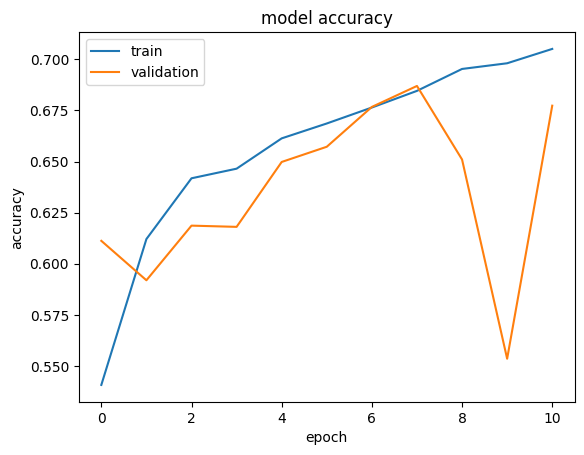

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

**Observations and Insights:**

- Stopped training at epoch 11 because there was no imporvement in terms of val_loss for last 3 epochs
- There is alot of noise in the above model
- The model was imporving till 7th epoch, then there is alot of fluctuation in training accuracy
- In the above plot, the training accuracy of the model and validation accuracy both are not good.
- This shows that the model is not stable and not performing well. That is why we cannot use this model

### **Fix the seed for random number generators**


we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
backend.clear_session()

# seed for random number generators will be erased becasue of clear session, Fix it again
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## **ResNet V2 Model**

In [ ]:
resnet = ap.ResNet101(include_top = False,
                      weights = "imagenet",
                      input_shape=(48,48,3))
resnet.summary()

171446536/171446536 [==============================] - 7s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Flattenning the output from the 3rd block of the VGG16 model
transfer_layer_Resnet = resnet.get_layer('conv5_block3_add')
resnet.trainable=False

# Add classification layers on top of it
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

# Initializing the model
model_resnet = Model(resnet.input, pred)

### **Compiling and Training the Model**

In [ ]:
# Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
model_resnet.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint("./model_resnet.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# fit resnet model. Use train_set as the training data and validation_set as the validation data. Train the model for 10 epochs.
history = model_resnet.fit(train_set,
                 validation_data=validation_set,
                 epochs = epochs,
                 callbacks = callbacks_list
                 )

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.4972 - accuracy: 0.2570

473/473 [==============================] - 218s 445ms/step - loss: 1.4972 - accuracy: 0.2570 - val_loss: 1.4768 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4135 - accuracy: 0.2516

473/473 [==============================] - 209s 442ms/step - loss: 1.4135 - accuracy: 0.2516 - val_loss: 1.3436 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.4033 - accuracy: 0.2601

473/473 [==============================] - 241s 509ms/step - loss: 1.4033 - accuracy: 0.2601 - val_loss: 1.3510 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/10
473/473 [==============================] - ETA: 0s - loss: 1.3941 - accuracy: 0.2671

473/473 [==============================] - 240s 507ms/step - loss: 1.3941 - accuracy: 0.2671 - val_loss: 1.3815 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 1.3939 - accuracy: 0.2634Restoring model weights from the end of the best epoch: 2.



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 207s 438ms/step - loss: 1.3939 - accuracy: 0.2634 - val_loss: 1.3576 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5: early stopping


### **Evaluating the ResNet Model**

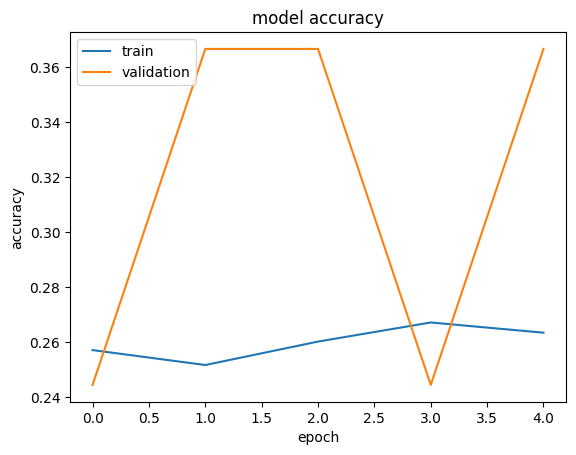

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:**

- Stopped training at epoch 5 because there was no imporvement in terms of val_loss for last 3 epochs
- There is no corelation b/w train and validation data
- In the above plot, the training accuracy of the model and validation accuracy both are not good.
- This shows that the model is not stable and not performing well. That is why we cannot use this model


**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

### **Fix the seed for random number generators**


we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
backend.clear_session()

# seed for random number generators will be erased becasue of clear session, Fix it again
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

## **EfficientNet Model**

In [ ]:
efficientNet = ap.EfficientNetV2B2(include_top=False,
                                   weights="imagenet",
                                   input_shape= (48, 48, 3))
efficientNet.summary()

35839040/35839040 [==============================] - 2s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_EfficientNet = efficientNet.get_layer('block6e_expand_activation')
efficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation='softmax')(x)

model_efficientnet = Model(efficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
# Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
model_efficientnet.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint("./model_resnet.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [ ]:
# fit resnet model. Use train_set as the training data and validation_set as the validation data. Train the model for 10 epochs.
history = model_efficientnet.fit(train_set,
                                              validation_data=validation_set,
                                              epochs = epochs,
                                              callbacks = callbacks_list
                                              )

Epoch 1/10
473/473 [==============================] - ETA: 0s - loss: 1.5560 - accuracy: 0.2585

473/473 [==============================] - 79s 150ms/step - loss: 1.5560 - accuracy: 0.2585 - val_loss: 1.9650 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4456 - accuracy: 0.2633

473/473 [==============================] - 65s 136ms/step - loss: 1.4456 - accuracy: 0.2633 - val_loss: 1.3733 - val_accuracy: 0.2447 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.4088 - accuracy: 0.2661

473/473 [==============================] - 65s 138ms/step - loss: 1.4088 - accuracy: 0.2661 - val_loss: 1.4552 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/10
473/473 [==============================] - ETA: 0s - loss: 1.3936 - accuracy: 0.2660

473/473 [==============================] - 69s 147ms/step - loss: 1.3936 - accuracy: 0.2660 - val_loss: 1.3680 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 1.3880 - accuracy: 0.2694

473/473 [==============================] - 63s 134ms/step - loss: 1.3880 - accuracy: 0.2694 - val_loss: 1.3615 - val_accuracy: 0.3663 - lr: 0.0010
Epoch 6/10
473/473 [==============================] - ETA: 0s - loss: 1.3869 - accuracy: 0.2667

473/473 [==============================] - 70s 149ms/step - loss: 1.3869 - accuracy: 0.2667 - val_loss: 1.3916 - val_accuracy: 0.2447 - lr: 0.0010
Epoch 7/10
473/473 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.2643

473/473 [==============================] - 71s 150ms/step - loss: 1.3863 - accuracy: 0.2643 - val_loss: 1.3622 - val_accuracy: 0.2964 - lr: 0.0010
Epoch 8/10
473/473 [==============================] - ETA: 0s - loss: 1.3849 - accuracy: 0.2647Restoring model weights from the end of the best epoch: 5.



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 72s 151ms/step - loss: 1.3849 - accuracy: 0.2647 - val_loss: 1.3769 - val_accuracy: 0.2950 - lr: 0.0010
Epoch 8: early stopping


### **Evaluating the EfficientnetNet Model**

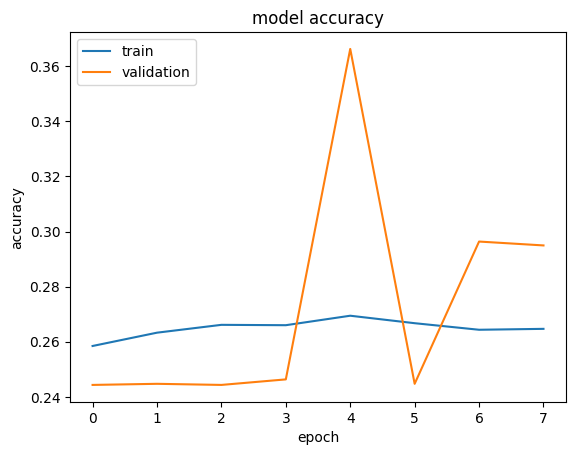

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:__**

- EfficientNet model is very similar to ResNet V2 model
- Stopped training at epoch 8 because learning rate is less than 0.0001
in last 3 epochs
- There is no corelation b/w train and validation data
- In the above plot, the training accuracy of the model and validation accuracy both are not good.
- This shows that the model is not stable and not performing well. That is why we cannot use this model



**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
# Store path of train images, validation images and test images in a variable, called train_dir, validation_dir and test_dir respectively,
# and storing the unique categories/labels in a list
train_dir = folder_path + "train"
validation_dir = folder_path + "validation"
test_dir = folder_path + "test"

categories =  ["happy", "sad", "neutral", "surprise"]

batch_size  = 32
img_size = 48

In [ ]:
datagen = ImageDataGenerator(horizontal_flip = True,
                             brightness_range=(0.,2.),
                             rescale=1./255,
                             shear_range=0.3)

train_set = datagen.flow_from_directory(train_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 15109 images belonging to 4 classes.


In [ ]:
validation_set = datagen.flow_from_directory(validation_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 4977 images belonging to 4 classes.


In [ ]:
test_set = datagen.flow_from_directory(test_dir,
                                        target_size = (img_size, img_size),
                                        color_mode = "grayscale",
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True)

Found 128 images belonging to 4 classes.


### **Data Preprocessing**

The arrays train_set and test_set had the images stored as arrays with their corresponding labels as the class indexes. So in essence, our train_set and test_set were arrays of tuples, where each tuple contained the image and its label.

In the following cells, we will unpack the tuples. We will shuffle our train_set and test_set, and store the images in x_train, and x_test, and the labels in y_train, and y_test respectively.

In [ ]:
# Create two list for train dataset:
x_train = [] # store the Numpy arrays
y_train = [] # corresponding labels

for i in range(len(train_set)):
    x_train.append(train_set[i][0])
    y_train.append(train_set[i][1])

In [ ]:
# Create two list for validation dataset
x_validation = [] # store the Numpy arrays
y_validation = [] # corresponding labels


for i in range(len(validation_set)):
    x_validation.append(validation_set[i][0])
    y_validation.append(validation_set[i][1])

In [ ]:
# Create two list for test dataset
x_test = [] # store the Numpy arrays
y_test = [] # corresponding labels

for i in range(len(test_set)):
    x_test.append(test_set[i][0])
    y_test.append(test_set[i][1])

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
model_cnn = Sequential()

# Add first Conv2D layer with 64 filters and a kernel size = 2, padding = 'same' and provide the input shape = (48, 48, 1). Use activation = 'relu'.
model_cnn.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu', padding = "same", input_shape = (48, 48, 1)))

# Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of 0.1
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(0.1))

# Add MaxPooling2D layer with pool size = 2.
model_cnn.add(MaxPooling2D(pool_size = 2))

# Add a Dropout layer with a Dropout Ratio of 0.2
model_cnn.add(Dropout(0.2))

# Add a second Conv2D layer with 128 filters and a kernel size of 2.
model_cnn.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = "same"))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(0.1))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

# Third Conv2D layer with 512 filters and a kernel size of 2.
model_cnn.add(Conv2D(filters = 512, kernel_size = 2, activation = 'relu', padding = "same"))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(0.1))
model_cnn.add(MaxPooling2D(pool_size = 2))
model_cnn.add(Dropout(0.2))

# Add a fourth block, with the Conv2D layer having 512 filters.
model_cnn.add(Conv2D(filters = 512, kernel_size = 2, activation = 'relu', padding = "same"))

# Add the fifth block, having 128 filters.
model_cnn.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = "same"))

# Then Add your Flatten layer, followed by your Dense layers.
model_cnn.add(Flatten())

# For first fully connected block, add your first Dense layer with 256 neurons using activation = 'relu'
# followed by a BatchNormalization layer
model_cnn.add(Dense(256, activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

# Add your second Dense layer with 512 neurons, again followed by a BatchNormalization layer, relu activation, and a Dropout layer.
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.2))

# Add your final Dense layer with 4 neurons.
model_cnn.add(Dense(4, activation = 'softmax'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

### **Compiling and Training the Model**

In [ ]:
# Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
model_cnn.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model_cnn.h5",
                             monitor = 'val_accuracy',
                             save_weights_only = True,
                             model = 'max',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              min_lr = 0.0001,
                              model = 'auto')

callbacks = [checkpoint, reduce_lr]

epochs = 35

In [ ]:
# fit cnn model. Use train_set as the training data and validation_set as the validation data. Train the model for 35 epochs.
history = model_cnn.fit(train_set,
          validation_data=validation_set,
          epochs = epochs,
          callbacks = callbacks
  )

Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.5305 - accuracy: 0.3104
Epoch 1: saving model to model_cnn.h5
473/473 [==============================] - 227s 474ms/step - loss: 1.5305 - accuracy: 0.3104 - val_loss: 1.5291 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 2/35
473/473 [==============================] - ETA: 0s - loss: 1.2695 - accuracy: 0.4292
Epoch 2: saving model to model_cnn.h5
473/473 [==============================] - 229s 483ms/step - loss: 1.2695 - accuracy: 0.4292 - val_loss: 1.5649 - val_accuracy: 0.4173 - lr: 0.0010
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.1461 - accuracy: 0.4965
Epoch 3: saving model to model_cnn.h5
473/473 [==============================] - 227s 480ms/step - loss: 1.1461 - accuracy: 0.4965 - val_loss: 1.1711 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 4/35
473/473 [==============================] - ETA: 0s - loss: 1.0546 - accuracy: 0.5415
Epoch 4: saving model to model_cnn.h5
473/473 [===========

### **Evaluating the Model on Test Set**

In [ ]:
model_cnn.evaluate(x_test[0], y_test[0])

1/1 [==============================] - 0s 142ms/step - loss: 0.9297 - accuracy: 0.6250


[0.9296958446502686, 0.625]

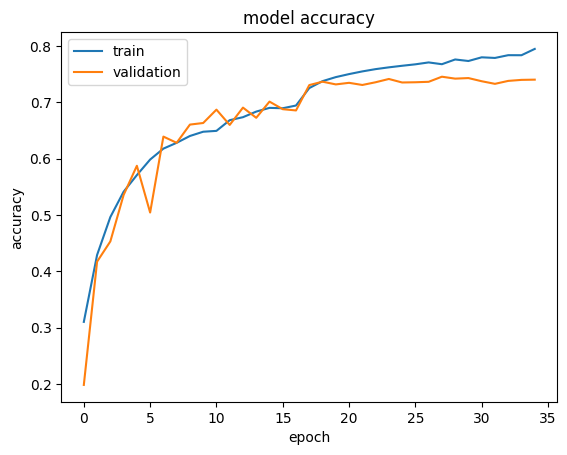

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations and Insights:**
- Initial training accuracy is fluctuating but after 20 epoch it start converging towards validation
- This model is comparatively promising then all the previous one.

### **Plotting the Confusion Matrix for the chosen final model**

- Basic neural network model is not doing well and has some overfitting issues
- The second Convolutional Neural Network model is highly overfitting the training data and does not perform well with validation data
- VGG16, Resnet and EfficientNet models perform poorly on the validation data. These models are not stable and are not performing well
- Out of all the above models, Complicated Convolutional Neural Network is camparatively promising. After 20 epoch, validation accuracy is very much inline with training accuracy
- That is why, I will be using last model to plot the confusion matrix

In [ ]:
test_set = datagen.flow_from_directory(folder_path + "test",
                                        target_size = (img_size,img_size),
                                        color_mode = 'grayscale',
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                        shuffle = True)

test_images, test_labels = next(test_set)

Found 128 images belonging to 4 classes.


In [ ]:
test_pred = model_cnn.predict(test_images)
test_pred = np.argmax(test_pred, axis = -1)

1/1 [==============================] - 0s 307ms/step


In [ ]:
y_test = np.argmax(test_labels, axis = -1)

In [ ]:
# Printing the classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.12      0.14      0.13         7
           2       0.25      0.25      0.25         8
           3       1.00      1.00      1.00        12

    accuracy                           0.59        32
   macro avg       0.59      0.55      0.57        32
weighted avg       0.62      0.59      0.61        32



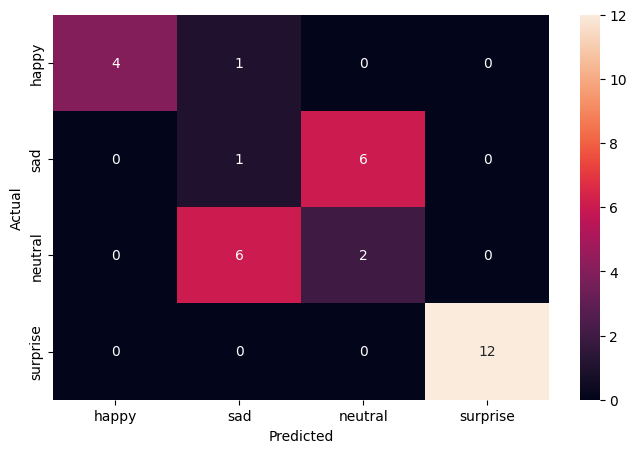

In [ ]:
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])

plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**
- In very few cases, the model is not able to identify the correct catgory.
- The model distinguishes happy and surprise emotions very well, however it is having hard time distinguishing between sad and neutral facial expression.
- The model is performing adequate with around 60% percision, recall, and f1-score but not adequate enough for deployment on production.



## **Conclusion:**
- We have 4 classes of images for facial emtion detection namely happy, sad, neutral and surprise.
- The dataset contains 15109 train, 4977 validation and 128 test images belonging to these 4 classes.
- The dataset is evenly distributed amongst all the classes
- In this notebook, we have implemetned several models from scratch and use transfer learning to make predictions.
- All the transfer learning models, i.e. VGG16, resnet V2 and efficientNet, performed poorly on validation data and does not show improvement after around 10 epoch.
- Out of all the above models, Complex Neural Network Architecture is comparatively promising, that is why we are using this model for plotting confusion matrix
- This model is doing well with happy and surprised images, however it is having hard time distinguishing between sad and neutral facial expression.
The model is performing adequate with around 60% percision, recall, and f1-score



### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

- The model distinguishes happy and surprise emotions very well, however it is having hard time distinguishing between sad and neutral facial expression.


### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- Validation in basic Neural Network method is inline with train data, however it shows overfitting issue throughout.

- Models created using transfer learning techniques were not very helpful in this project.

-  In Complex Neural Network Architecture, validation will be inline with train data with increasing epoch, but it still gives around 60% percision, recall, and f1-score, which can be imporved

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

- Complex Neural Network Architecture - as it starts to converge with increasing epoch